### **Week 3**

**DATASET** <br>
https://raw.githubusercontent.com/NathaliaMinoque/dataset/refs/heads/main/MBA.csv <br>



**METADATA** <br>
application_id: Unique identifier for each application <br>
gender: Applicant's gender (Male, Female)<br>
international: International student (TRUE/FALSE)<br>
gpa: Grade Point Average of the applicant (on 4.0 scale)<br>
major: Undergraduate major (Business, STEM, Humanities)<br>
race: Racial background of the applicant (e.g., White, Black, Asian, Hispanic, Other / null: international student)<br>
gmat: GMAT score of the applicant (800 points)<br>
work_exp: Number of years of work experience (Year)<br>
work_industry: Industry of the applicant's previous work experience (e.g., Consulting, Finance, Technology, etc.)<br>
admission: Admission status (Admit, Waitlist, Null: Deny)<br>

In [126]:
#Import Library
import pandas as pd
import matplotlib.pyplot as plt

1. display 5 columns from dataset

In [127]:
#1
url='https://raw.githubusercontent.com/NathaliaMinoque/dataset/refs/heads/main/MBA.csv'
df= pd.read_csv(url)
df.head()

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,NaN
2,3,Female,True,3.30,Business,NaN,710.0,5.0,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,NaN
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,NaN


2. display the info column and conclude what the insight is from that column

In [128]:
#2
df.info()

#conclusion
#from datas below, we have 6194 entries and almost all columns have Non-Null Counts.
#And the columns with null values are race and admission.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   application_id  6194 non-null   int64  
 1   gender          6194 non-null   object 
 2   international   6194 non-null   bool   
 3   gpa             6194 non-null   float64
 4   major           6194 non-null   object 
 5   race            4352 non-null   object 
 6   gmat            6194 non-null   float64
 7   work_exp        6194 non-null   float64
 8   work_industry   6194 non-null   object 
 9   admission       1000 non-null   object 
dtypes: bool(1), float64(3), int64(1), object(5)
memory usage: 441.7+ KB


3. display the number of each unique value in the race and admission columns (including NaN)

In [129]:
#3a
print(df['admission'].value_counts(dropna=False))

NaN         5194
Admit        900
Waitlist     100
Name: admission, dtype: int64


In [130]:
#3b
print(df['race'].value_counts(dropna=False))

NaN         1842
White       1456
Asian       1147
Black        916
Hispanic     596
Other        237
Name: race, dtype: int64


4. fill NaN values in admission column to "deny" and null values in in race column to "other"

In [131]:
#4
df['admission'].fillna('deny', inplace=True)
df['admission'].fillna('other', inplace=True)

5. recheck missing value

In [132]:
#5
df.isnull().sum()

application_id       0
gender               0
international        0
gpa                  0
major                0
race              1842
gmat                 0
work_exp             0
work_industry        0
admission            0
dtype: int64

6. drop application_id column

In [133]:
# 6
df = df.drop('application_id', axis=1)

7. show describe column and conclude what the insight is from that column

In [134]:
#7
df.describe()

#conclusion
#from datas below, we can conclude that people have average gpa of 3.25.
#because the max of gpa is 3.77 and min is 2.65, we can conclude that most people have gpa above 3.

,gpa,gmat,work_exp
count,6194.000000,6194.000000,6194.000000
mean,3.250714,651.092993,5.016952
std,0.151541,49.294883,1.032432
min,2.650000,570.000000,1.000000
25%,3.150000,610.000000,4.000000
50%,3.250000,650.000000,5.000000
75%,3.350000,680.000000,6.000000
max,3.770000,780.000000,9.000000


8. make a visualization to analyze admission status based on major and explain the conclusions

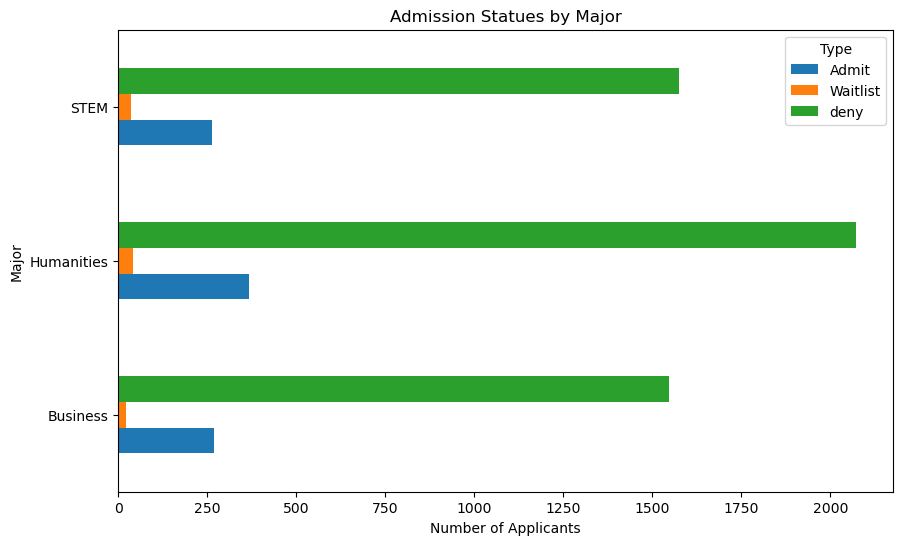

In [135]:
#8
count_type_by_quality = df.groupby(['major','admission'])['admission'].count().unstack()
count_type_by_quality.plot (kind='barh',figsize=(10,6))

plt.title('Admission Statues by Major')
plt.xlabel('Number of Applicants')
plt.ylabel('Major')
plt.legend(title='Type')
plt.show()

#Conclusion
#From the datas shown below, we can see that most people get denied in Humanities major but Humanities also admi most people.
#So we can conclude that most people wanted to work in Humanities major.

9. make a visualization to analyze the admissions in each major based on gender and explain the conclusions

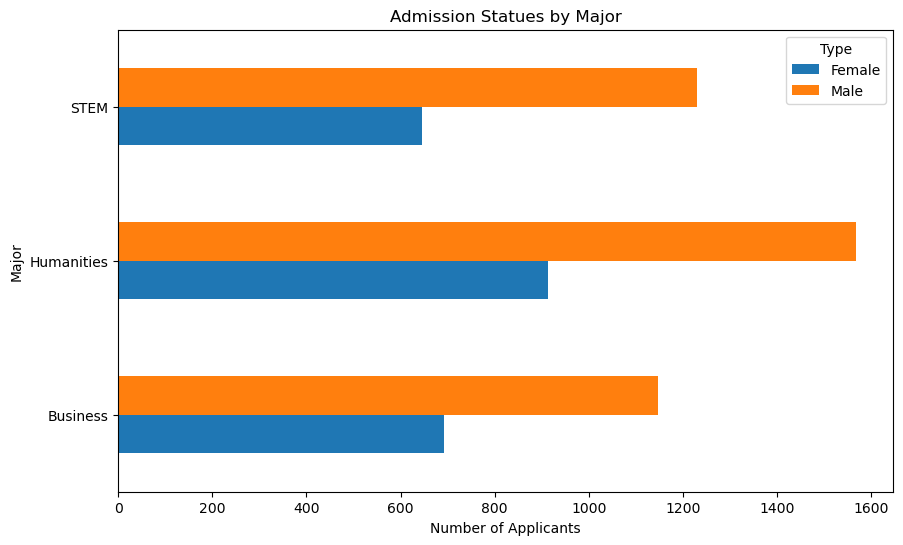

In [136]:
#9
count_type_by_quality = df.groupby(['major','gender'])['gender'].count().unstack()
count_type_by_quality.plot (kind='barh',figsize=(10,6))

plt.title('Admission Statues by Major')
plt.xlabel('Number of Applicants')
plt.ylabel('Major')
plt.legend(title='Type')
plt.show()

#conclusions
#From the datas shown below, we can see that most of the workers are males than females.
#This is probably because most females prefer to work at home while taking care of their children after being a mother.

10. create your own insightful visualization and explain it in at least 2 sentences

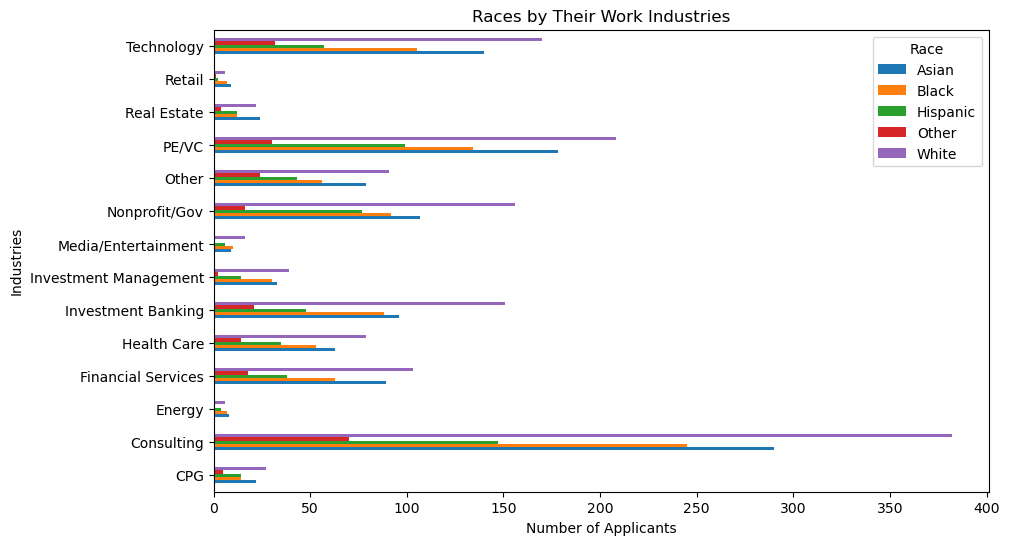

In [137]:
#10
count_type_by_quality = df.groupby(['work_industry','race'])['race'].count().unstack()
count_type_by_quality.plot (kind='barh',figsize=(10,6))

plt.title('Races by Their Work Industries')
plt.xlabel('Number of Applicants')
plt.ylabel('Industries')
plt.legend(title='Race')
plt.show()
#From the datas shown below, we can see that white races work most jobs. 
#And the ones work least jobs are others, so we need to give other races more opportunities to work.

11. create your own insightful visualization and explain it in at least 2 sentences

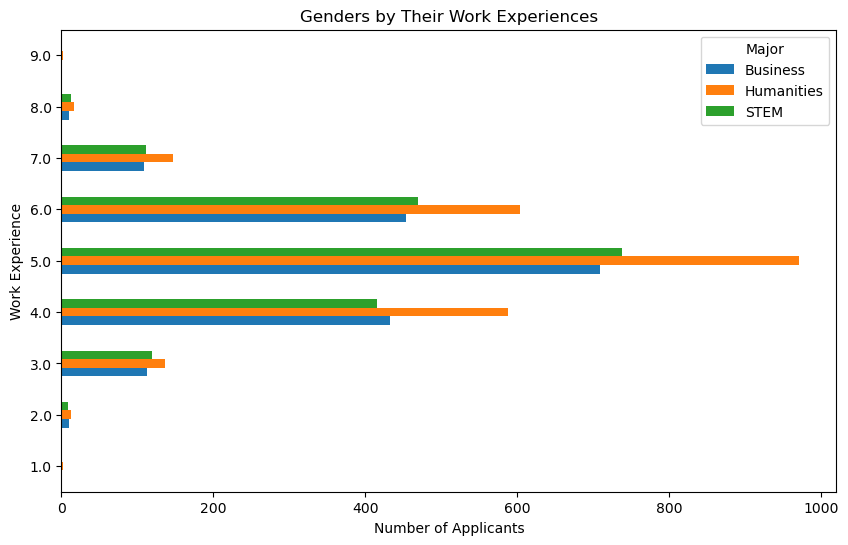

In [138]:
#11
count_type_by_quality = df.groupby(['work_exp','major'])['major'].count().unstack()
count_type_by_quality.plot (kind='barh',figsize=(10,6))

plt.title('Genders by Their Work Experiences')
plt.xlabel('Number of Applicants')
plt.ylabel('Work Experience')
plt.legend(title='Major')
plt.show()

#From datas shown below, we can see that most people have an average experience working and that is 5.0.
#And humanites major is also the most experienced job because it's the highest on every work experiences.

12. encode categorical columns and display the results

In [139]:
#12a
#encode X
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['international'] = le.fit_transform(df['international'])
df['major'] = le.fit_transform(df['major'])
df['race'] = le.fit_transform(df['race'])
df['work_industry'] = le.fit_transform(df['work_industry'])
df.head()

,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,0,0,3.30,0,0,620.0,3.0,3,Admit
1,1,0,3.28,1,1,680.0,5.0,6,deny
2,0,1,3.30,0,5,710.0,5.0,13,Admit
3,1,0,3.47,2,1,690.0,6.0,13,deny
4,1,0,3.35,2,2,590.0,5.0,1,deny


In [140]:
#12b
#encode y
df['admission'] = le.fit_transform(df['admission'])
from sklearn.preprocessing import LabelEncoder
df.head()

,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,0,0,3.30,0,0,620.0,3.0,3,0
1,1,0,3.28,1,1,680.0,5.0,6,2
2,0,1,3.30,0,5,710.0,5.0,13,0
3,1,0,3.47,2,1,690.0,6.0,13,2
4,1,0,3.35,2,2,590.0,5.0,1,2


13. create a heatmap to see the correlation and explain the conclusion

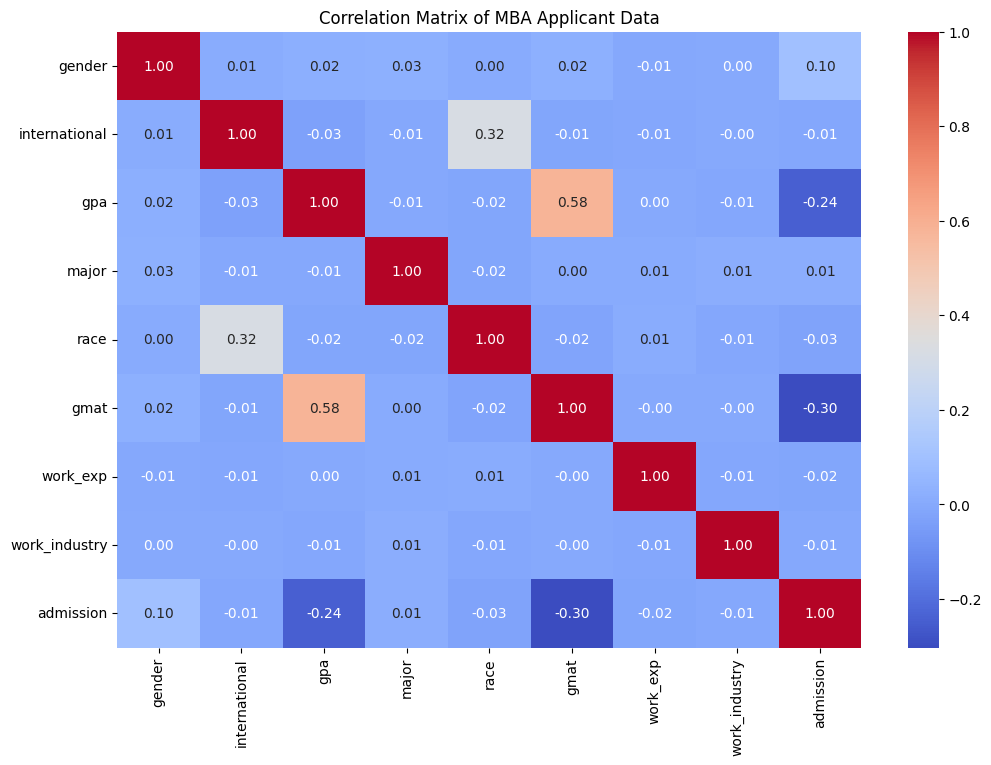

In [ ]:
#13
import seaborn as sns

plt.subplots(figsize=(7,5))
sns.heatmap(en_df.corr(), vmin=-1, vmax=1, cmap="RdBu", annot=True)
plt.show()

#Conclusion
#from this heatmap below, we can see that the most affect the admission accepatnces are gpa and gmat.
#meanwhile the other columns like gender or work_exp don't really help with the acceptance.

**Challenge! Get Extra 10 Points**<br>

get extra 10 points if you can help Lisa predict whether she will be accepted or not.
Lisa is a local student, Lisa's gpa is the average of all applicants, during her undergraduate Lisa studied entrepreneurship, Lisa has an Asian race, gmat score 580, has worked from 2018 to 2020 as a finance.

In [145]:
#Challenge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics 


y = df['admission']
X = df[[
    'gender',
    'international',	
    'gpa',
    'major',
    'gmat',
    'work_exp',
    'work_industry'
    ]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create a Decision Tree Classifier
clf = DecisionTreeClassifier()

# Train the model
clf = clf.fit(X_train,y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

average_gpa = df['gpa'].sum()/df['gpa'].count()


# Asian = 0, Finance = 3, Business technically is for entrepreneurs
prediction = clf.predict([[0,0,average_gpa,0,580,2,3]])

predicted_role = ""
if prediction == 0:
    predicted_role = "Accepted"
elif prediction == 2:
    predicted_role = "Denied"
elif prediction == 1:
    predicted_role = "Waitlist"



print("Lisa is likely to be : "+str(predicted_role))


Accuracy: 0.778046811945117
Lisa is likely to be : Denied


C:\Users\ekasu\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
